<a href="https://colab.research.google.com/github/SainzayaBaasankhuu/Data-Science-Projects/blob/main/Decision%20Tree%E2%80%94%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Data file (2).csv to Data file (2).csv
Dataset Preview:
   Income_Level  Credit_Score Loan_Approved  Employment_Status_Unemployed
0        141958            76           Yes                             0
1        166867             2           Yes                             0
2        151932            69            No                             1
3        123694            71           Yes                             0
4        139879            26            No                             1


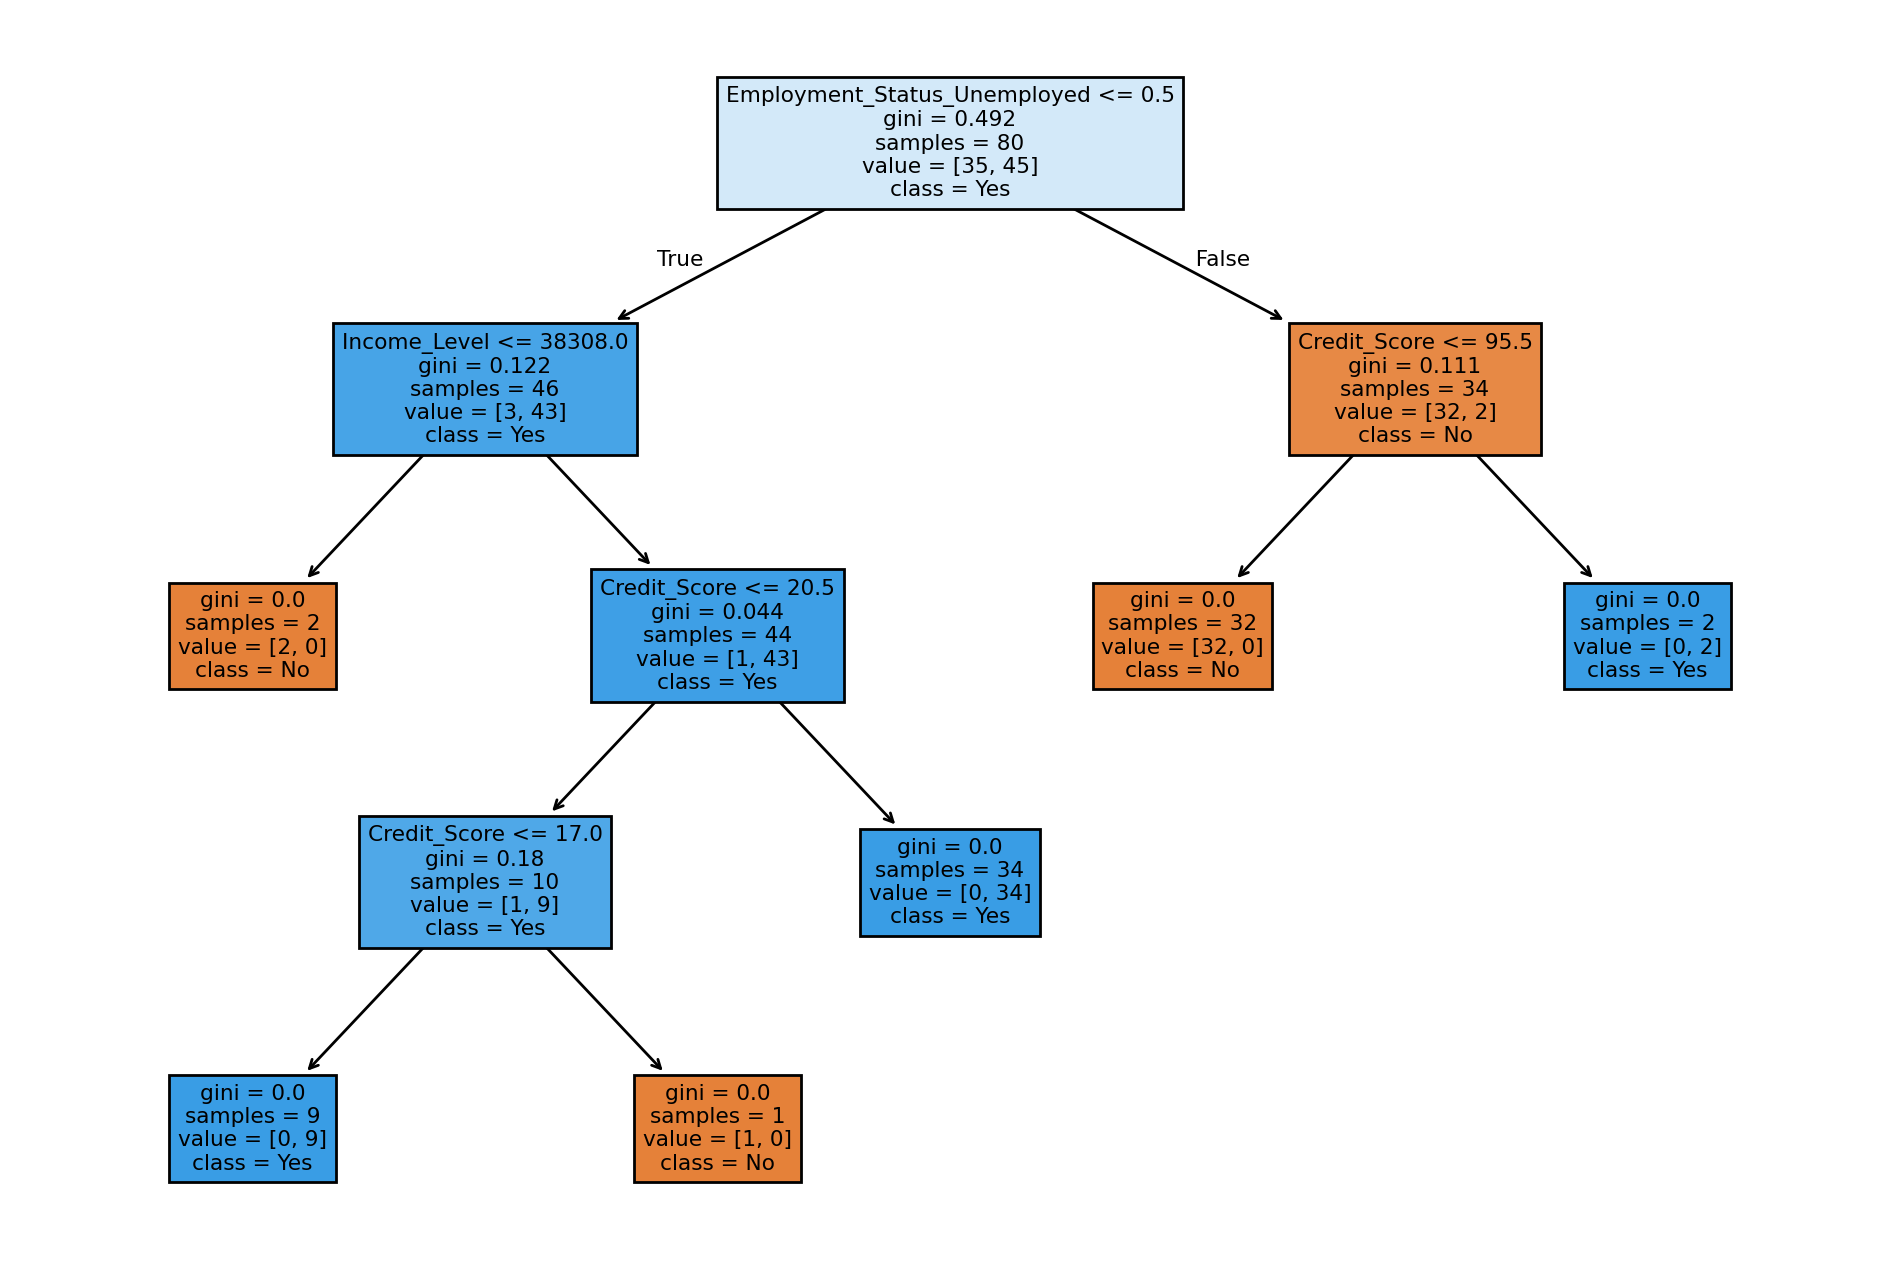

Feature Importances:
                              Feature Importance
Employment_Status_Unemployed            0.761945
Credit_Score                            0.145251
Income_Level                            0.092804
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

          No       0.58      1.00      0.74         7
         Yes       1.00      0.62      0.76        13

    accuracy                           0.75        20
   macro avg       0.79      0.81      0.75        20
weighted avg       0.85      0.75      0.75        20



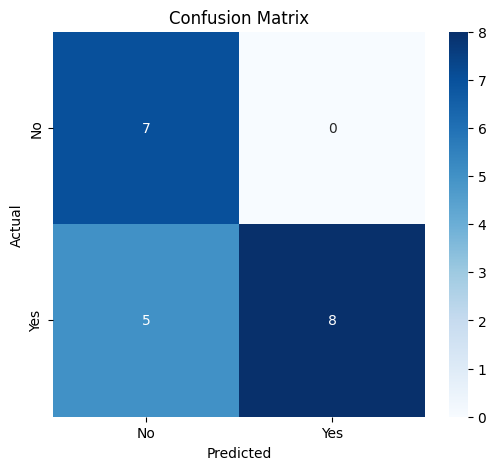

In [1]:
import pandas as pd
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from google.colab import files

# Upload dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Preview dataset
print("Dataset Preview:")
print(df.head())

# Convert target variable to numerical
df["Loan_Approved"] = df["Loan_Approved"].map({"No": 0, "Yes": 1})

# Split features and target
X = df.drop(columns=["Loan_Approved"])
y = df["Loan_Approved"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

# Feature importance
feature_importances = pd.DataFrame(index=X.columns, data=clf.feature_importances_, columns=['Feature Importance'])
feature_importances = feature_importances.sort_values(by='Feature Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Model evaluation
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [2]:
print(df[["Income_Level", "Credit_Score"]].mean())

Income_Level    107118.92
Credit_Score        50.04
dtype: float64
